In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk

In [2]:
dataset = pd.read_csv('Classification Data.csv')

In [3]:
dataset.shape

(4521, 17)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4521 non-null   int64 
 1   job          4521 non-null   object
 2   marital      4521 non-null   object
 3   education    4521 non-null   object
 4   default      4521 non-null   object
 5   balance      4521 non-null   int64 
 6   housing      4521 non-null   object
 7   loan         4521 non-null   object
 8   contact      4521 non-null   object
 9   day          4521 non-null   int64 
 10  month        4521 non-null   object
 11  duration     4521 non-null   int64 
 12  campaign     4521 non-null   int64 
 13  pdays        4521 non-null   int64 
 14  previous     4521 non-null   int64 
 15  poutcome     4521 non-null   object
 16  y            4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
dataset = dataset.rename(columns={'y': 'Subscription_Status'})

In [6]:
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription_Status
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [7]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
dataset.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription_Status
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [9]:
print(dataset.shape)
print(dataset.columns)
print(dataset.dtypes)

(4521, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous   ', 'poutcome', 'Subscription_Status'],
      dtype='object')
age                     int64
job                    object
marital                object
education              object
default                object
balance                 int64
housing                object
loan                   object
contact                object
day                     int64
month                  object
duration                int64
campaign                int64
pdays                   int64
previous                int64
poutcome               object
Subscription_Status    object
dtype: object


In [10]:
print(dataset.isnull().sum())

age                    0
job                    0
marital                0
education              0
default                0
balance                0
housing                0
loan                   0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
Subscription_Status    0
dtype: int64


In [11]:
print(dataset.describe())
print(dataset.describe(include=['object']))  # For categorical variables

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays  previous     
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  
               job

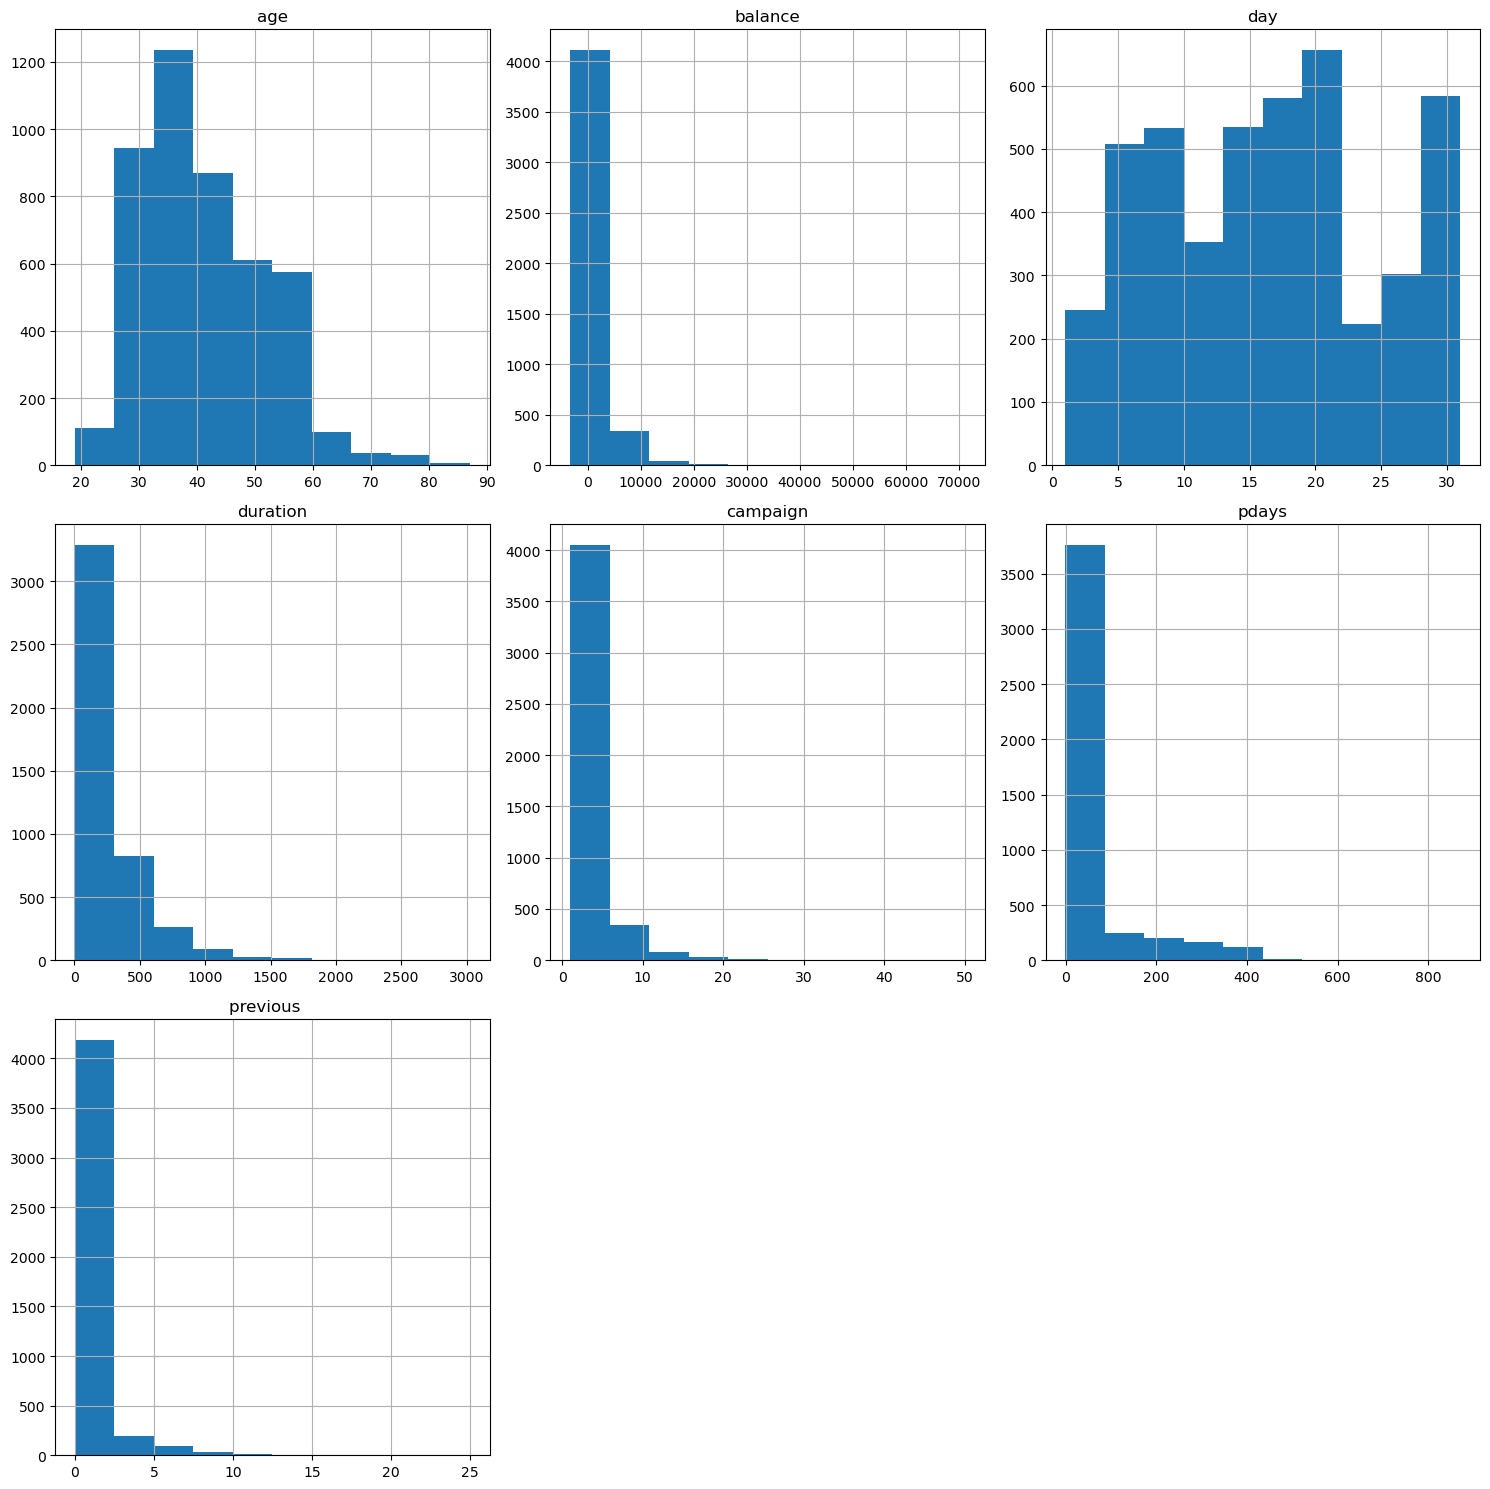

In [12]:
# Histograms for numerical variables
dataset.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()


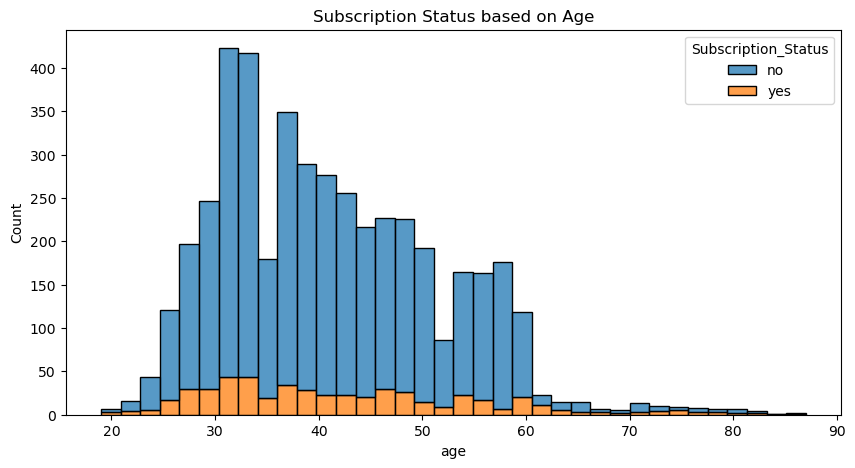

In [13]:
plt.figure(figsize = (10 , 5))
plt.title("Subscription Status based on Age")
sns.histplot(x= "age" , hue = "Subscription_Status" , multiple='stack',data = dataset)
plt.show()

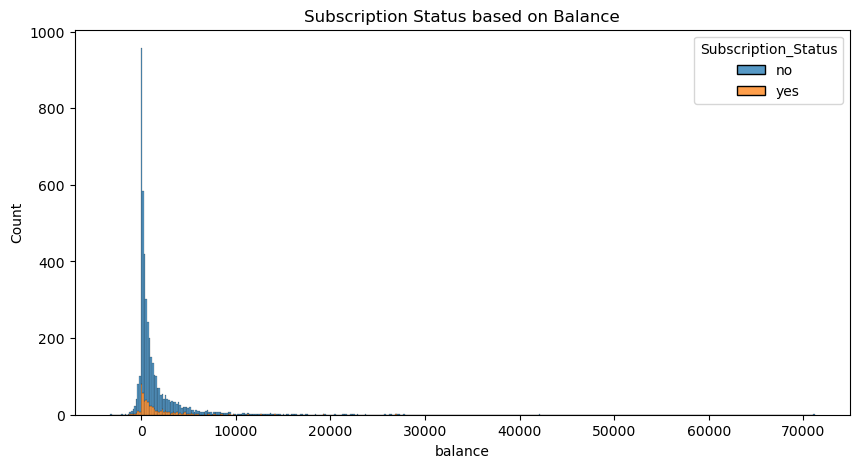

In [14]:
plt.figure(figsize = (10 , 5))
plt.title("Subscription Status based on Balance")
sns.histplot(x= "balance" , hue = "Subscription_Status" , multiple='stack',data = dataset)
plt.show()

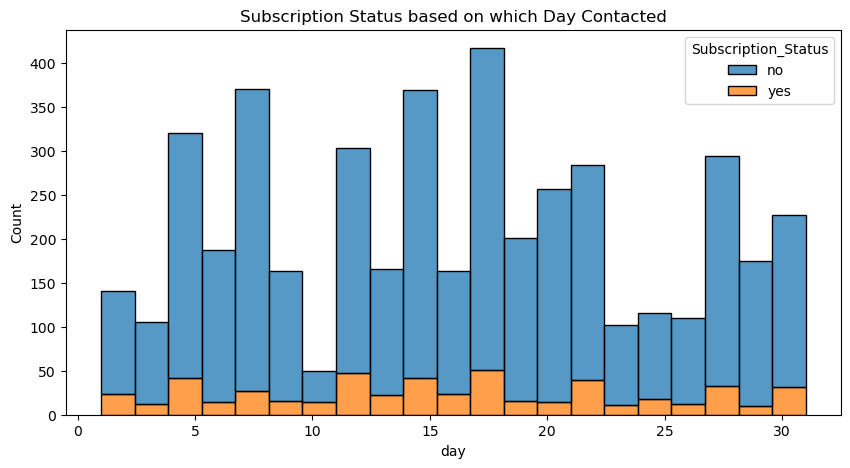

In [15]:
plt.figure(figsize = (10 , 5))
plt.title("Subscription Status based on which Day Contacted")
sns.histplot(x= "day" , hue = "Subscription_Status" , multiple='stack',data = dataset)
plt.show()

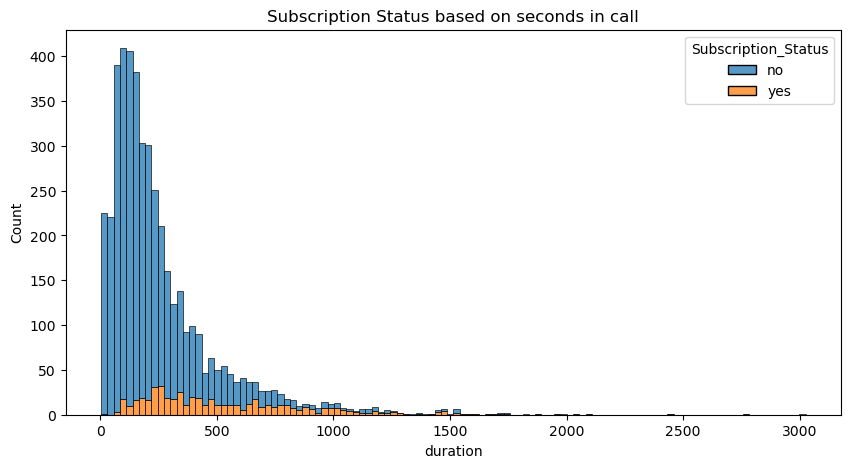

In [16]:
plt.figure(figsize = (10 , 5))
plt.title("Subscription Status based on seconds in call")
sns.histplot(x= "duration" , hue = "Subscription_Status" , multiple='stack',data = dataset)
plt.show()

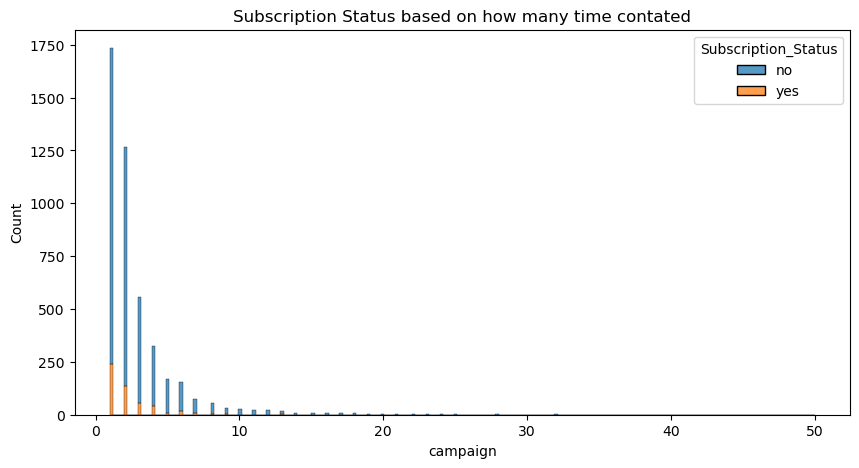

In [17]:
plt.figure(figsize = (10 , 5))
plt.title("Subscription Status based on how many time contated")
sns.histplot(x= "campaign" , hue = "Subscription_Status" , multiple='stack',data = dataset)
plt.show()

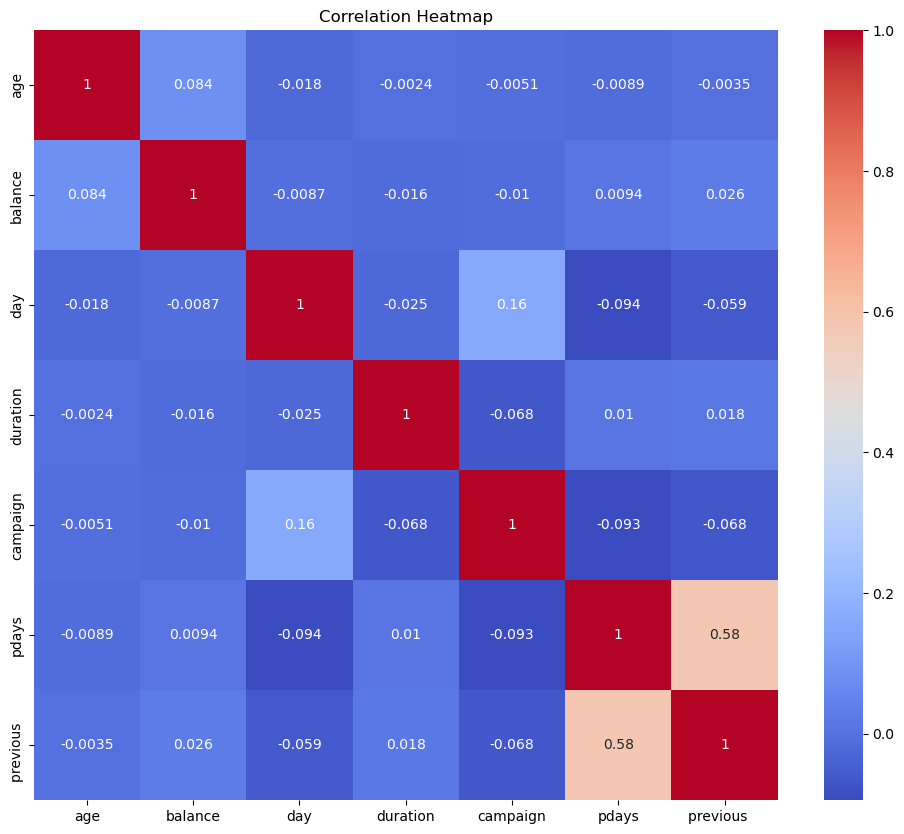

In [18]:
# Correlation heatmap for numerical variables
corr_matrix = dataset.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
#Descrining the categorical columns

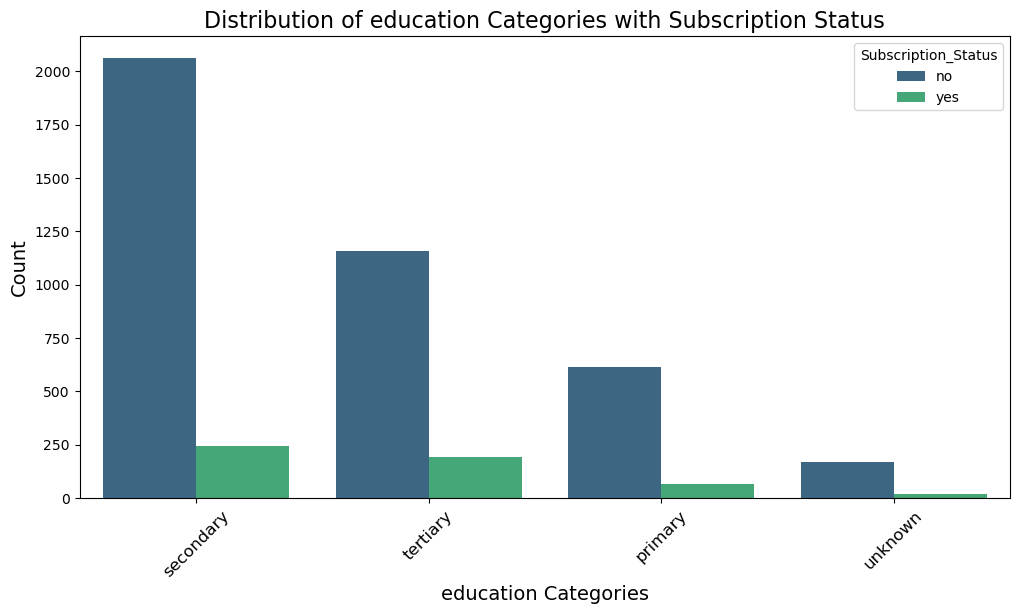

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size
sns.countplot(data=dataset, x='education', hue='Subscription_Status', order=dataset['education'].value_counts().index, palette='viridis')
plt.title("Distribution of education Categories with Subscription Status", fontsize=16)
plt.xlabel("education Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.show()

In [21]:
dataset['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

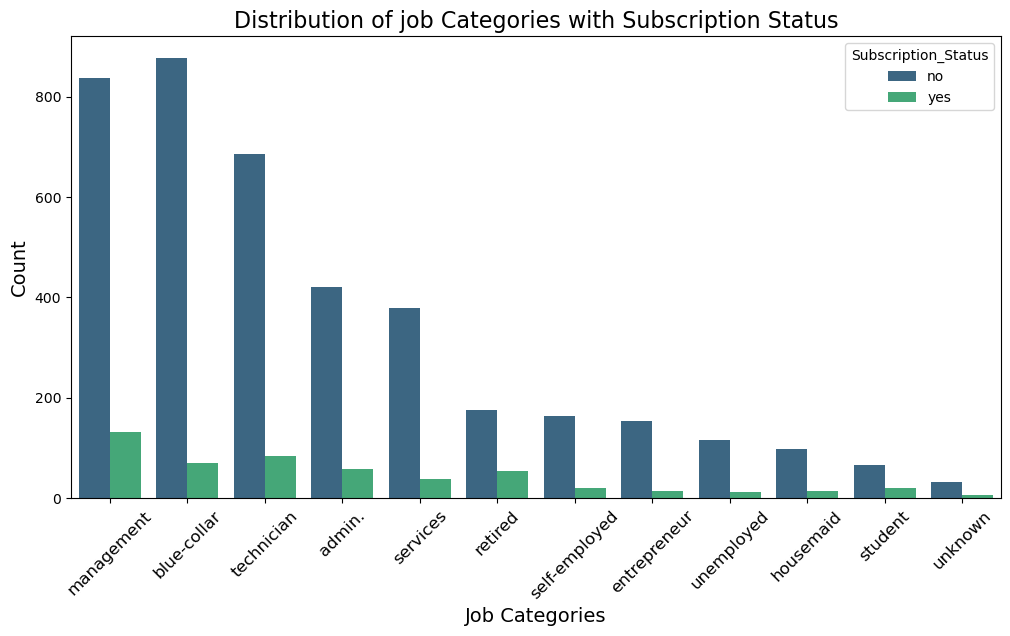

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size
sns.countplot(data=dataset, x='job', hue='Subscription_Status', order=dataset['job'].value_counts().index, palette='viridis')
plt.title("Distribution of job Categories with Subscription Status", fontsize=16)
plt.xlabel("Job Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.show()

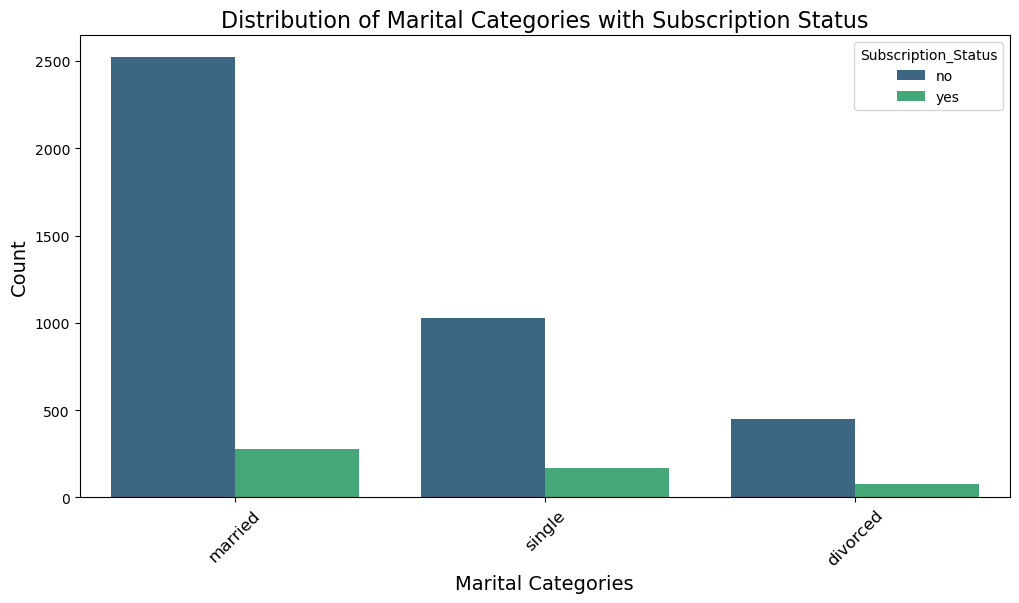

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size
sns.countplot(data=dataset, x='marital', hue='Subscription_Status', order=dataset['marital'].value_counts().index, palette='viridis')
plt.title("Distribution of Marital Categories with Subscription Status", fontsize=16)
plt.xlabel("Marital Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.show()


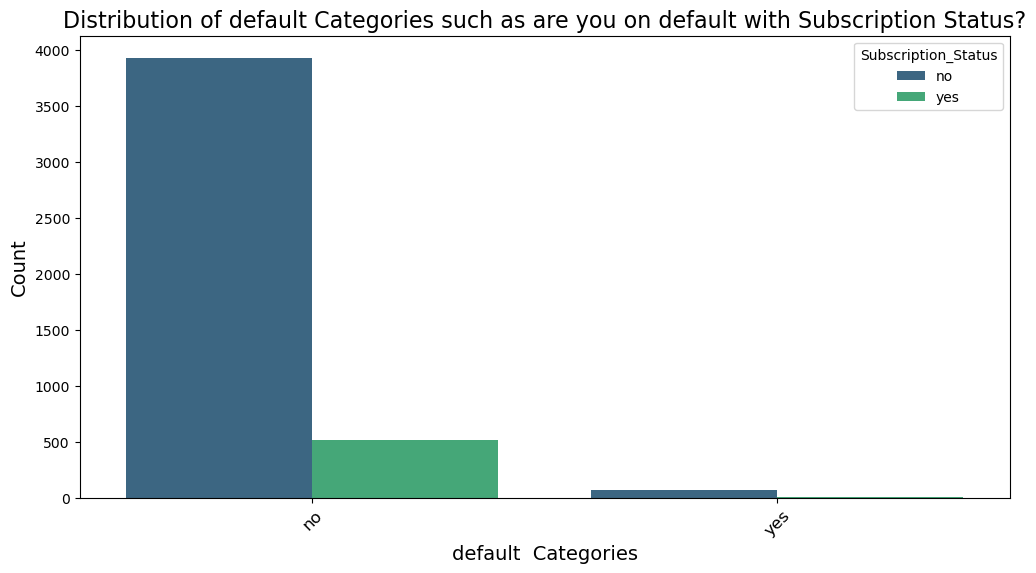

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size
sns.countplot(data=dataset, x='default', hue='Subscription_Status', order=dataset['default'].value_counts().index, palette='viridis')
plt.title("Distribution of default Categories such as are you on default with Subscription Status?", fontsize=16)
plt.xlabel("default  Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.show()

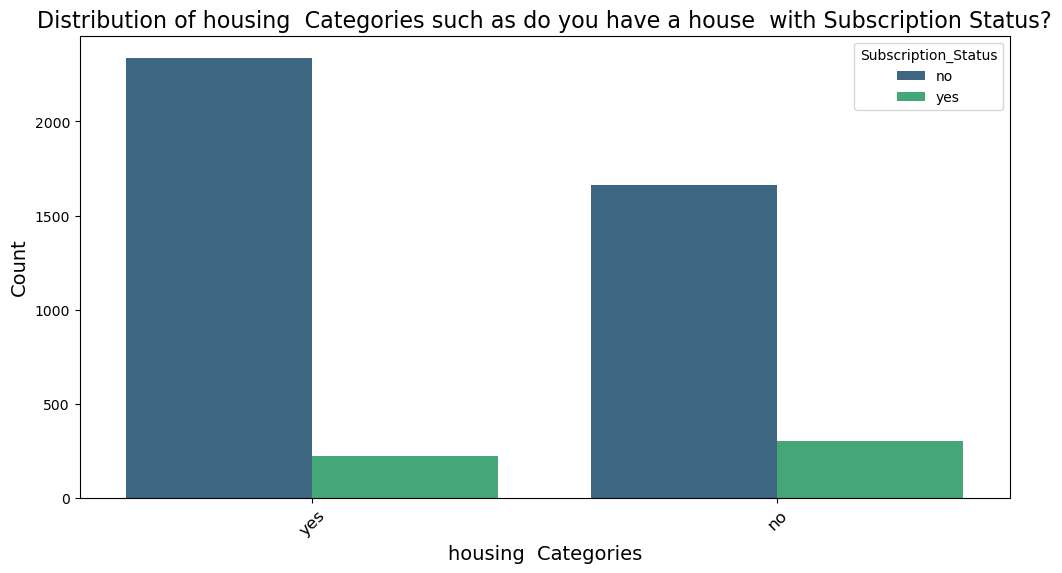

In [25]:


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size
sns.countplot(data=dataset, x='housing', hue='Subscription_Status', order=dataset['housing'].value_counts().index, palette='viridis')
plt.title("Distribution of housing  Categories such as do you have a house  with Subscription Status?", fontsize=16)
plt.xlabel("housing  Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.show()

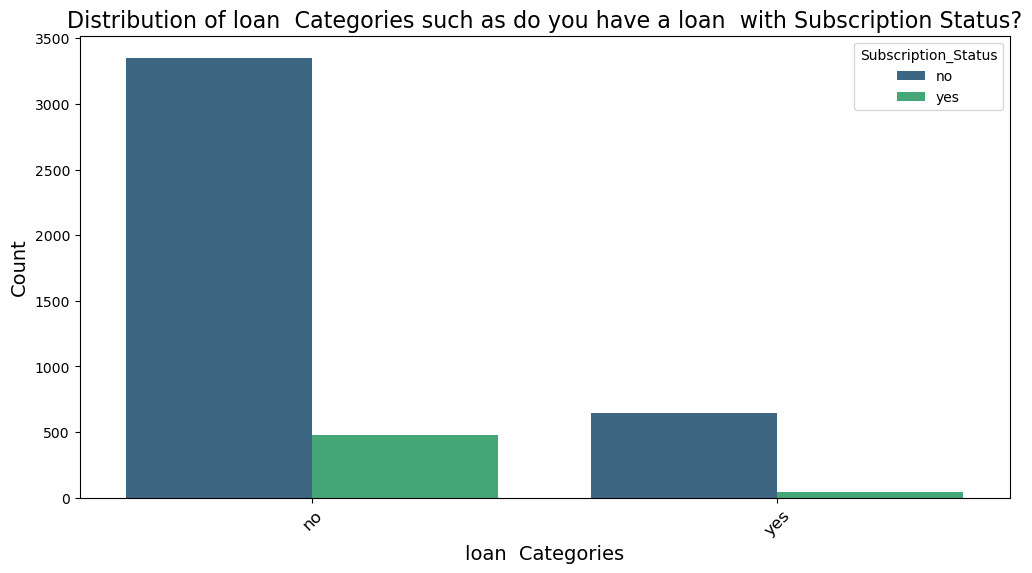

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size
sns.countplot(data=dataset, x='loan', hue='Subscription_Status', order=dataset['loan'].value_counts().index, palette='viridis')
plt.title("Distribution of loan  Categories such as do you have a loan  with Subscription Status?", fontsize=16)
plt.xlabel("loan  Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.show()

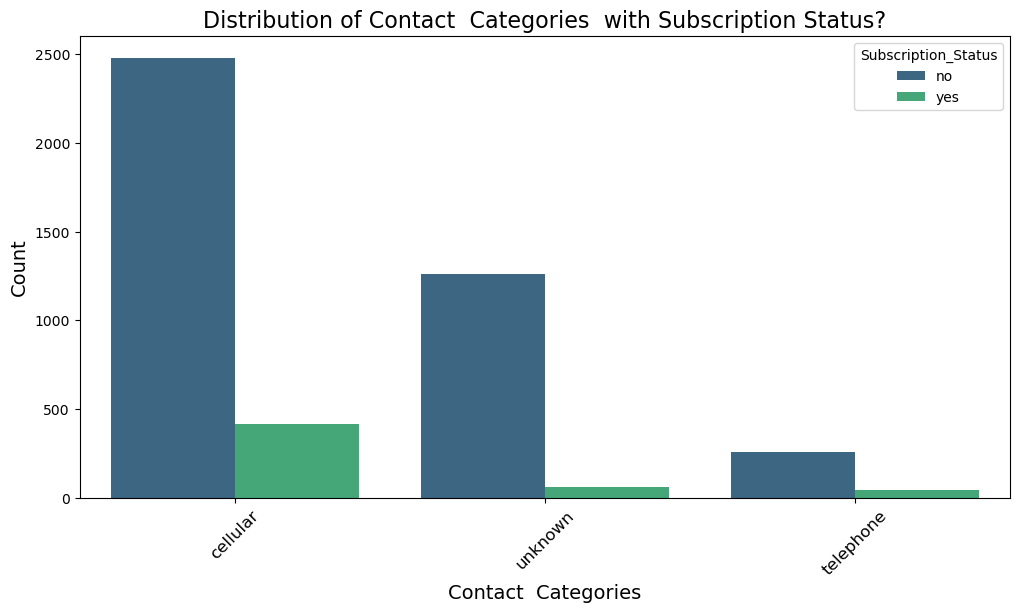

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size
sns.countplot(data=dataset, x='contact', hue='Subscription_Status', order=dataset['contact'].value_counts().index, palette='viridis')
plt.title("Distribution of Contact  Categories  with Subscription Status?", fontsize=16)
plt.xlabel("Contact  Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.show()

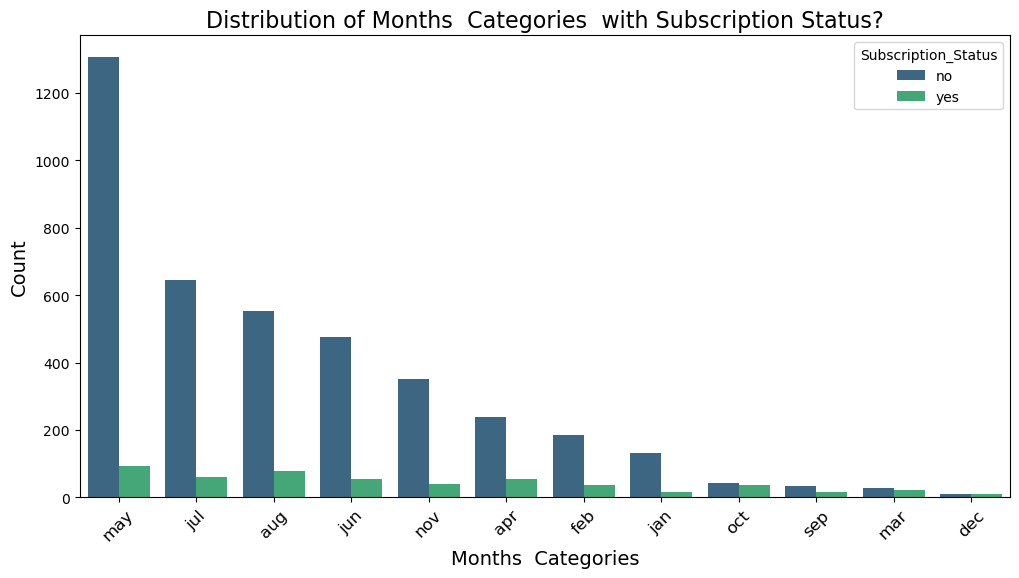

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size
sns.countplot(data=dataset, x='month', hue='Subscription_Status', order=dataset['month'].value_counts().index, palette='viridis')
plt.title("Distribution of Months  Categories  with Subscription Status?", fontsize=16)
plt.xlabel("Months  Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.show()

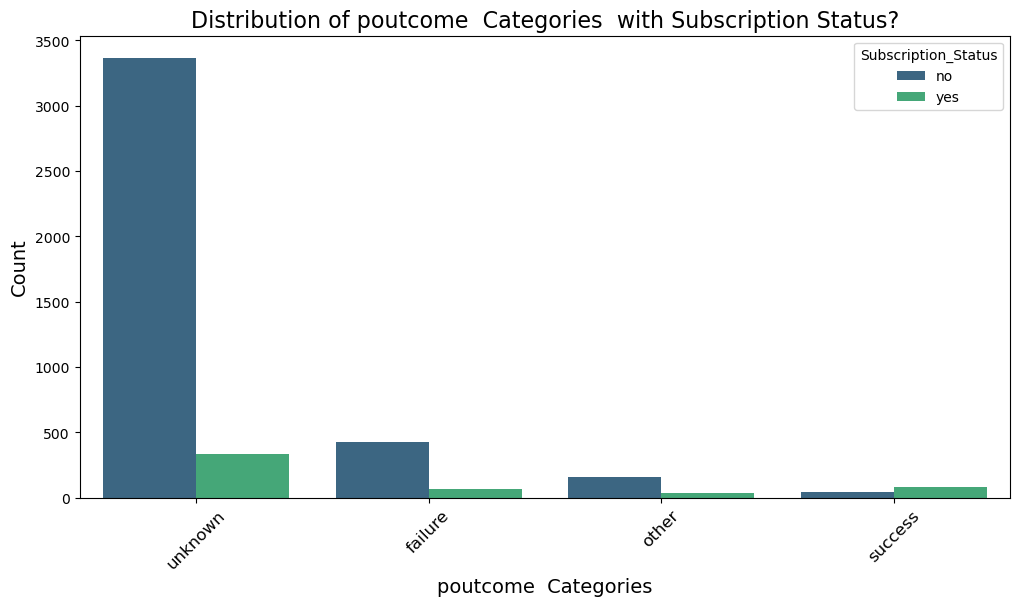

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size
sns.countplot(data=dataset, x='poutcome', hue='Subscription_Status', order=dataset['poutcome'].value_counts().index, palette='viridis')
plt.title("Distribution of poutcome  Categories  with Subscription Status?", fontsize=16)
plt.xlabel("poutcome  Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.show()     

In [30]:
#class imbalance
dataset['Subscription_Status'].value_counts()

Subscription_Status
no     4000
yes     521
Name: count, dtype: int64

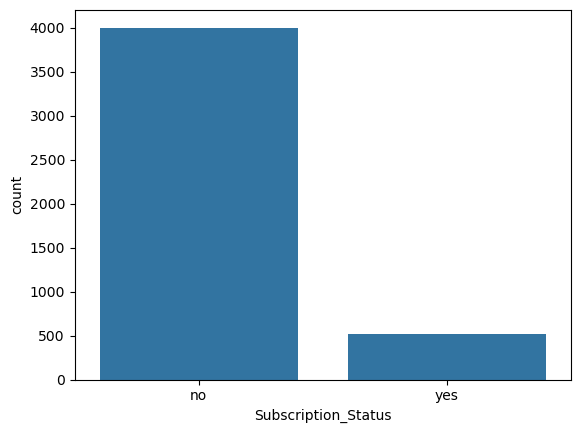

In [31]:
sns.countplot(dataset, x="Subscription_Status") 
plt.show() 

In [32]:
print(dataset.dtypes)

age                     int64
job                    object
marital                object
education              object
default                object
balance                 int64
housing                object
loan                   object
contact                object
day                     int64
month                  object
duration                int64
campaign                int64
pdays                   int64
previous                int64
poutcome               object
Subscription_Status    object
dtype: object


In [33]:
# Get categorical columns
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Subscription_Status'],
      dtype='object')


In [34]:
from sklearn import preprocessing


In [35]:
enc = preprocessing.OrdinalEncoder()


In [36]:
dataset['job'] = enc.fit_transform(dataset['job'].values.reshape(-1,1))
dataset['marital'] = enc.fit_transform(dataset['marital'].values.reshape(-1,1))
dataset['education'] = enc.fit_transform(dataset['education'].values.reshape(-1,1))
dataset['default'] = enc.fit_transform(dataset['default'].values.reshape(-1,1))
dataset['housing'] = enc.fit_transform(dataset['housing'].values.reshape(-1,1))
dataset['loan'] = enc.fit_transform(dataset['loan'].values.reshape(-1,1))
dataset['contact'] = enc.fit_transform(dataset['contact'].values.reshape(-1,1))
dataset['month'] = enc.fit_transform(dataset['month'].values.reshape(-1,1))
dataset['poutcome'] = enc.fit_transform(dataset['poutcome'].values.reshape(-1,1))
dataset['Subscription_Status'] = enc.fit_transform(dataset['Subscription_Status'].values.reshape(-1,1))


In [37]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription_Status
0,30,10.0,1.0,0.0,0.0,1787,0.0,0.0,0.0,19,10.0,79,1,-1,0,3.0,0.0
1,33,7.0,1.0,1.0,0.0,4789,1.0,1.0,0.0,11,8.0,220,1,339,4,0.0,0.0
2,35,4.0,2.0,2.0,0.0,1350,1.0,0.0,0.0,16,0.0,185,1,330,1,0.0,0.0
3,30,4.0,1.0,2.0,0.0,1476,1.0,1.0,2.0,3,6.0,199,4,-1,0,3.0,0.0
4,59,1.0,1.0,1.0,0.0,0,1.0,0.0,2.0,5,8.0,226,1,-1,0,3.0,0.0


In [38]:
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index([], dtype='object')


In [39]:
X = dataset.iloc[: , [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]] . values
y = dataset.iloc[: , [16]] . values

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.3 ,random_state = 0)

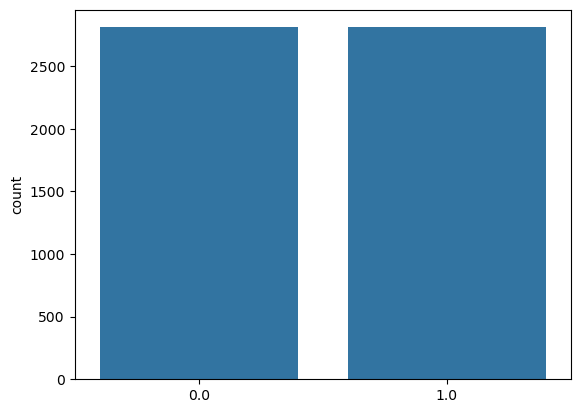

In [41]:
#for class imbalane
from imblearn.over_sampling import RandomOverSampler 
resampler=RandomOverSampler(random_state=0) 
X_train_oversampled,y_train_oversampled=resampler.fit_resample(X_train,y_train) 
sns.countplot(x=y_train_oversampled) 
plt.show() 

In [42]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold selector with threshold set to 0
variance_selector = VarianceThreshold(threshold=0)

# Apply fit_transform on the training set and transform on the test set
X_train_fs = variance_selector.fit_transform(X_train_oversampled)
X_test_fs = variance_selector.transform(X_test)

# Corrected print statement
print(f"{X_train.shape[1] - X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

0 features have been removed, 16 features remain


In [43]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train_oversampled)
X_test_s = sc.transform(X_test)


In [132]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)

# Fit the classifier to the training data
classifier.fit(X_train_s, y_train_oversampled)

KNeighborsClassifier(n_neighbors=3)

In [134]:
y_pred = classifier.predict(X_test_s)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [140]:
print("Real Labels: ", y_test)
print("Predicted Labels: ", y_pred)

Real Labels:  [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Predicted Labels:  [0. 0. 0. ... 0. 0. 0.]


In [172]:
from sklearn import metrics
# Uing the test data so thats why 
# Predict the labels for the test set
y_pred = classifier.predict(X_test_s)  

# Calculate accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (acc * 100))  # Display accuracy as a percentage

# Generate confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
print('---------------------------')

# Generate classification report
result = metrics.classification_report(y_test, y_pred)
print('Classification Report fo:r KNN')
print(result)

Accuracy: 83.86
Confusion Matrix:
[[1065  125]
 [  94   73]]
---------------------------
Classification Report fo:r KNN
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91      1190
         1.0       0.37      0.44      0.40       167

    accuracy                           0.84      1357
   macro avg       0.64      0.67      0.65      1357
weighted avg       0.85      0.84      0.84      1357



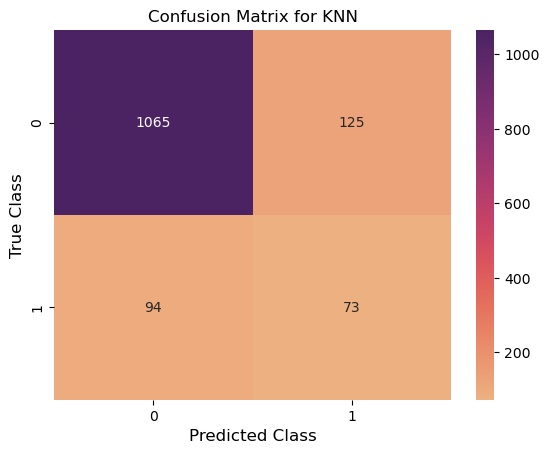

In [168]:
# Create the heatmap
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

# Add labels and title
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix for KNN", fontsize=12)

# Show the plot
plt.show()

In [182]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

# Assuming you have your training data (X_train_oversampled and y_train_oversampled)
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)

# Calculate baseline accuracy with all features
baseline_accuracy = cross_val_score(knn, X_train_s, y_train_oversampled, cv=5).mean()

# Initialize a dictionary to hold feature importance
feature_importance = {}

# Loop over each feature and remove it to see the impact on accuracy
for i, column in enumerate(X_train_s.T):  
    X_train_reduced = np.delete(X_train_s, i, axis=1)  
    score = cross_val_score(knn, X_train_reduced, y_train_oversampled, cv=5).mean()
    feature_importance[f"Feature_{i+1}"] = baseline_accuracy - score  # Impact on accuracy

# Sort features by importance
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Display the sorted features by impact on accuracy
for feature, impact in sorted_feature_importance:
    print(f"Feature: {feature}, Impact on Accuracy: {impact:.4f}")


Feature: Feature_12, Impact on Accuracy: 0.0310
Feature: Feature_16, Impact on Accuracy: 0.0030
Feature: Feature_13, Impact on Accuracy: 0.0014
Feature: Feature_14, Impact on Accuracy: 0.0009
Feature: Feature_8, Impact on Accuracy: 0.0007
Feature: Feature_10, Impact on Accuracy: 0.0005
Feature: Feature_11, Impact on Accuracy: 0.0002
Feature: Feature_5, Impact on Accuracy: 0.0000
Feature: Feature_1, Impact on Accuracy: -0.0009
Feature: Feature_9, Impact on Accuracy: -0.0009
Feature: Feature_15, Impact on Accuracy: -0.0011
Feature: Feature_7, Impact on Accuracy: -0.0027
Feature: Feature_2, Impact on Accuracy: -0.0032
Feature: Feature_4, Impact on Accuracy: -0.0050
Feature: Feature_6, Impact on Accuracy: -0.0052
Feature: Feature_3, Impact on Accuracy: -0.0078
